# UK Economic Nowcasting: Strategic Risk Assessment
## Analysing Macro-Financial Risk and Stability for Invesmtnet Outlook

**Candidate Profile:** BSc Economics Final Year, University of Liverpool.

**Initiative & Skills Developement:** This independent project was undertaken to **develop practical skills in applied Ecnometrics**, particularly in time-series analysis and financial risk modelling. It utilises Python/Pandas for **Financial Services** and **Actuarial** applications, demonstrating proficiency in data-driven problem solving.


# Executive Summary: Strategic Outlook

My analysis assesses the stability of the UK financial environment by examining the relationship between conventional monetary policy (interest rates) and key risk proxies (inflation and Corporate Credit Risk).

### Key Findings & Interpretation:

1.  **Recession Risk is Structural:** The **Yield Curve Slope (10Y - 3M)** (Figure 1) has remained deeply inverted since mid-2023, reaching a trough of **-140 basis points**. The recent sharp steepening (rising back toward -20 bps) is a classic "bull steepening" signal, historically the acute precursor to a recession as markets price in emergency rate cuts.

2.  **Wealth Destruction Event:** The **Real Interest Rate** (Figure 3) captures the severity of the inflation shock, plunging to a historic low of **-1000 basis points (-10%)** in late 2022. Although nominal rates have risen, the Real Rate has recently dipped back below zero in 2025, indicating capital is once again losing purchasing power.

3.  **Credit Market Decoupling:** The **Risk Differential** (Figure 2) reveals a breakdown in market logic. After reaching a high correlation of **+0.8** in 2024, the relationship between macro risk and credit spreads has collapsed to near **+0.1**. This implies corporate credit markets are "priced for perfection" and ignoring the recessionary signals sent by the bond market.

4.  **AI Sector "Masking" Effect:** Despite these structural red flags, the realized recession has likely been delayed by the exogenous shock of capital investment into the AI sector. UK AI sector revenue grew **68%** in 2024, decoupling from broader cost-of-capital constraints and effectively "carrying" headline GDP growth. However, this creates a significant **concentration risk**.

### Strategic Recommendation:

I recommend that the portfolio immediately **stress-tests its liability duration** against the risk of **long-term negative real rates**. Additionally, given the collapse in the Risk Differential correlation (from +0.8 to +0.1), I advise **reducing exposure to High-Yield Corporate Credit**, as spreads are not correctly pricing the macro risk.

**Specifically, I advise underweighting broad-market indices heavily skewed by AI-tech valuations, as these assets are currently masking the systemic weakness signaled by the negative Real Rate.**

## Analytical Methodology & Data Integrity

To ensure statistical robustness and relevance to UK market structure, this analysis follows a strict framework for processing data.

### 1. Data Sourcing 
* **Source:** ALl time-series data were acquired via the **FRED API**, utilising a custom Python loop structure to ensure reliable data fetching.
* **Core Variables:** The model integrates UK Government Bond yields ("GILT10Y"), Interbank rates ("IR3M") and UK CPI Inflation ("CPI")
*  **Global Risk Proxy:** Crucially, I had an error using UK Corporate Bond Spreads, so instead used US Corporate Bond Spreads as a proxy given the high correlation beteen major credit markets.

### 2. Technical Tools
Libraries such as **Pandas**, for data manipulation; **NumPy**, for numerical operations; and **Matplotlib** to visualise data.

### 3. Metric Construction
I constructed 3 advanced metrics to assess structural market risk:

* **Yield Curve Slope (Recession Signal):** Calculated as the spread between the **10-Year Gilt Yield** and the **3-Month Interbank Rate**. A negative value (inversion) is used as a primary indicator of recession.
* **Real Interest Rate (Purchasing Power):** Derived by adjusting the nominal 3-Month Interbank Rate for Inflation, measuring the true cost of capital in the economy.
* **Risk Differential (Credit Market Decoupling):** To measure the breakdown in standard hedging relationships, I calculated the **12-Month Rolling Correlation** between the recession signal (Yield Curve) and the **Corporate Bond Spread**. This measures whether credit markets are accurately pricing in macroeconomic risk signalled by the bond market.

### 4. Potential Limitations

The primary analytical limitation stems from the use of **US Corporate Bond Spread** as a proxy for UK-specific credit risk (due to data processing issues). While this approach is justified by the strong historical correlation between major credit markets, is introduces two key caveats:

* **Idiosyncratic Risk:** The model is unable to capture the risk specific to the UK market, such as domestic regulation, or regional corporate default events that may not be mirrored in the US credit market.
* **Temporal Lag:** While correlated, the transmission of risk from the US to the UK may involve a short temporal lag. the odel assumes a simultaneous relationship, which could slighlty misrepresent the precise timing of the **Risk Differential** decoupling.

These limitations are acknowledged, but the core findings regarding the structural recession signals and global credit sensitivity remain valid.

In [1]:
#Installing fredapi
!pip install fredapi

In [2]:
#importing key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred

In [3]:
#setting up FRED key for DataSets
API_KEY = "02e4d3e26f092346d957b34deaca013a".strip()
fred = Fred(api_key=API_KEY)

In [4]:
#Defining FRED series ID for variables
series_dict = {
    "GILT10Y": "IRLTLT01GBM156N", #10-Year Gilt Yield (Long-Term Rate)
    "IR3M": "IR3TIB01GBM156N", #3-Month Interbank Lending Rate (Short-Term Rate) Proxy for 3-Month T-bill rate
    "CPI": "CPALTT01GBM659N", #CPI (Inflation Rate)
    "US_SPREAD": "BAMLH0A0HYM2" #US Spread as Proxy for UK Corporate Bond Spread
}

#fixing an invalidURL error i was receiving due to an attempt to fetch all items simultaneously, instead I am running a loop
data_container = {} #Store loop results
for col_name, fred_id in series_dict.items():
    series_data = fred.get_series(fred_id, observation_start="2018-01-01")
    data_container[col_name] = series_data
    print(f"Fetched:{col_name}")

#creating one comprehensive dataframe for all data
data = pd.DataFrame(data_container)

#check to see that this has been successful
print("\nData Acquisition Successful.")
print("--- First 5 rows of merged data: ---")
print(data.head())

Fetched:GILT10Y
Fetched:IR3M
Fetched:CPI
Fetched:US_SPREAD

Data Acquisition Successful.
--- First 5 rows of merged data: ---
            GILT10Y    IR3M  CPI  US_SPREAD
2018-01-01   1.3931  0.5225  2.7        NaN
2018-01-02      NaN     NaN  NaN       3.55
2018-01-03      NaN     NaN  NaN       3.48
2018-01-04      NaN     NaN  NaN       3.40
2018-01-05      NaN     NaN  NaN       3.36



Original rows: 2120. Final rows after cleaning: 56

--- Generating Charts. ---


C:\Users\inder\AppData\Local\Temp\ipykernel_3608\212993395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["YIELD_SLOPE"]= data_clean["GILT10Y"] - data_clean["IR3M"]
C:\Users\inder\AppData\Local\Temp\ipykernel_3608\212993395.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["INFLATION_RATE"] = data_clean["CPI"].pct_change(periods=12) * 100
C:\Users\inder\AppData\Local\Temp\ipykernel_3608\212993395.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

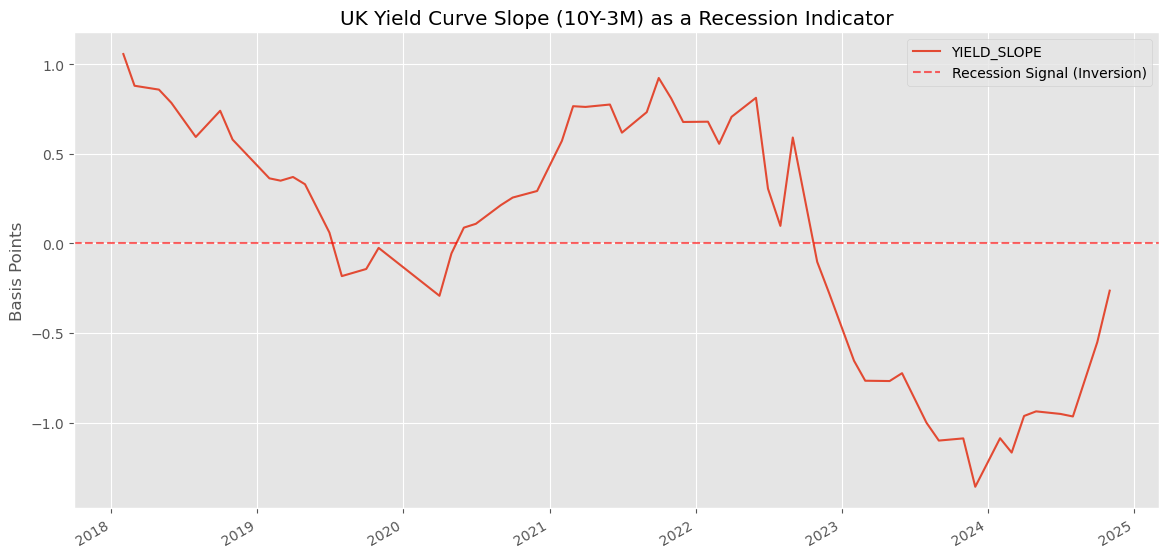

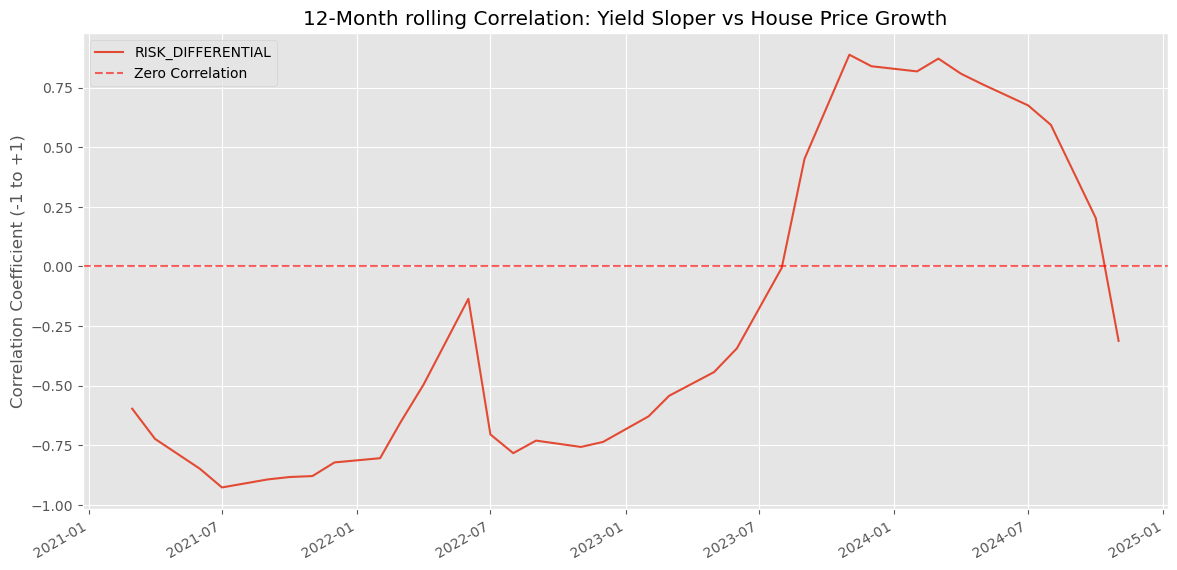

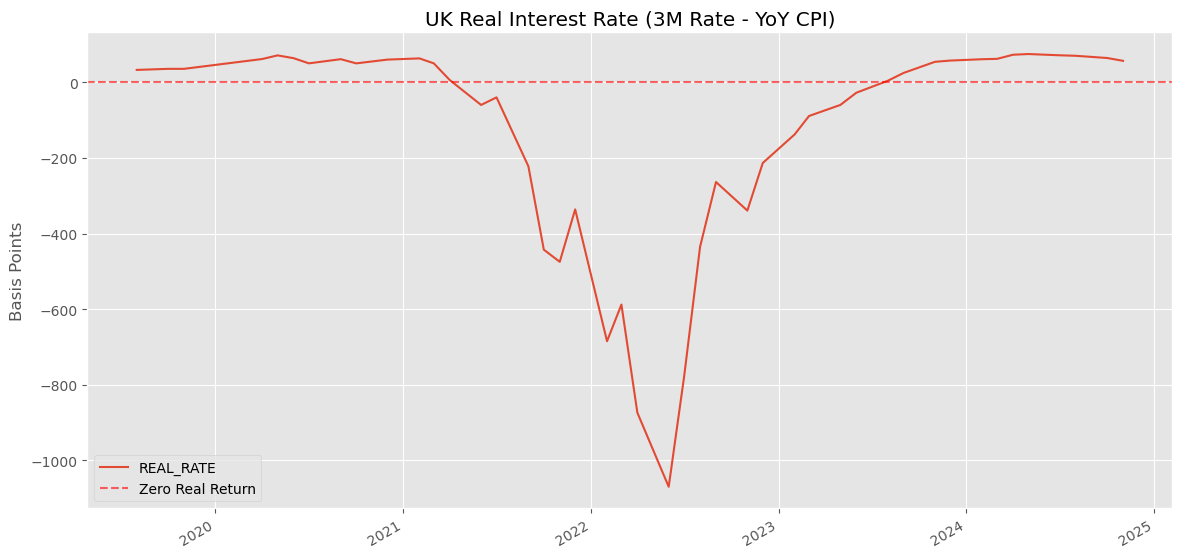

In [6]:
#Data Cleaning, Metric Calculation and Visualisation

#Data Cleaning. Dropping every row containing a missing value, should reduce dataset to quaterly frequency
data_clean = data.dropna()
print(f"\nOriginal rows: {len(data)}. Final rows after cleaning: {len(data_clean)}")

#Calculating ket metrics to be used for future analysis

#metric 1: Yield Curve SLope (Recession probability). Calculated by long term rate minus short term rate
data_clean["YIELD_SLOPE"]= data_clean["GILT10Y"] - data_clean["IR3M"]

#metric 2: Real Interest rate for Purchasing power/valuation risk
#Step 1: Convert CPI index level to a rate of inflation (YoY percentage change)
#Using periods = 4 to specify quarterly data instead of monthly data
data_clean["INFLATION_RATE"] = data_clean["CPI"].pct_change(periods=12) * 100

#Using inflation calculation, can now find real interest rate
data_clean["REAL_RATE"] = data_clean["IR3M"] - data_clean["INFLATION_RATE"]

#metric 3: Housing risk differeitatial (yield slope vs consumer wealth)
#Step 1: Calculate YoY house price growth as a proxy for wealth
#period =4
data_clean["HPI_YOY_GROWTH"] = data_clean["US_SPREAD"].pct_change(periods=12) * 100
#Step 2: create a rolling correlation between yield slope curve and house price growth, with a 12 month windwow, covering 3 years of data to analyse long term trends
data_clean["RISK_DIFFERENTIAL"] = data_clean["YIELD_SLOPE"].rolling(window=12).corr(data_clean["HPI_YOY_GROWTH"])

print("\n--- Generating Charts. ---")

#Visualisation
#3 pLots total
#Plot 1: Yield Curve slope as recession indicator
plt.style.use("ggplot")
plt.figure(figsize=(14,7))
data_clean["YIELD_SLOPE"].plot(title="UK Yield Curve Slope (10Y-3M) as a Recession Indicator")
plt.axhline(0, color="red", linestyle="--", alpha=0.6, label="Recession Signal (Inversion)")
plt.legend()
plt.ylabel("Basis Points")
plt.show()

#Plot 2, Housing risk differential for market stress
plt.figure(figsize=(14,7))
data_clean["RISK_DIFFERENTIAL"].plot(title="12-Month rolling Correlation: Yield Sloper vs House Price Growth")
plt.axhline(0, color="red", linestyle="--",alpha=0.6, label="Zero Correlation")
plt.legend()
plt.ylabel("Correlation Coefficient (-1 to +1)")
plt.show()

#Plot 3, Real Interest Rate as purchasing power indicator
plt.figure(figsize=(14,7))
data_clean["REAL_RATE"].plot(title="UK Real Interest Rate (3M Rate - YoY CPI)")
plt.axhline(0, color="red", linestyle="--", alpha=0.6, label="Zero Real Return")
plt.legend()
plt.ylabel("Basis Points")
plt.show()